In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearn.tree import DecisionTreeRegressor
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'plotly'

# loading  dataset

In [2]:
df=pd.read_excel('Sample - Superstore.xls')


In [3]:
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.describe()

Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df['Order Year']=pd.DatetimeIndex(df['Order Date']).year

In [9]:
df['difference_order_entered_to_arrival']=(df['Ship Date'] - df['Order Date']) / np.timedelta64(1, 'D')

In [10]:
cleaned_df = df.drop(['Product Name','Country','Customer Name','Row ID','Product ID','Sub-Category','Order ID','City','State','Postal Code','Customer ID','Order Date','Ship Date'], axis = 1)
print("Segment Categories: ",cleaned_df['Segment'].unique())
print("Region Categories: ",cleaned_df['Region'].unique())
print("Product Categories: ",cleaned_df['Category'].unique())
print("Order Years: ",cleaned_df['Order Year'].unique())

Segment Categories:  ['Consumer' 'Corporate' 'Home Office']
Region Categories:  ['South' 'West' 'Central' 'East']
Product Categories:  ['Furniture' 'Office Supplies' 'Technology']
Order Years:  [2016 2015 2014 2017]


In [11]:
#dummy encoding categorical features
Segments = pd.get_dummies(cleaned_df['Segment'])
Regions = pd.get_dummies(cleaned_df['Region'])
Categories = pd.get_dummies(cleaned_df['Category'])
OrderYears = pd.get_dummies(cleaned_df['Order Year'])
ShipMode = pd.get_dummies(cleaned_df['Ship Mode'])

#combining encoded features with orignal data
processed_results = pd.concat([cleaned_df, Segments ,Regions,Categories,OrderYears,ShipMode], axis=1, join='inner')
processed_results = processed_results.drop(['Region','Segment','Category','Order Year','Ship Mode'], axis = 1)
processed_results.head()

Sales  Quantity  Discount    Profit  \
0  261.9600         2      0.00   41.9136   
1  731.9400         3      0.00  219.5820   
2   14.6200         2      0.00    6.8714   
3  957.5775         5      0.45 -383.0310   
4   22.3680         2      0.20    2.5164   

   difference_order_entered_to_arrival  Consumer  Corporate  Home Office  \
0                                  3.0         1          0            0   
1                                  3.0         1          0            0   
2                                  4.0         0          1            0   
3                                  7.0         1          0            0   
4                                  7.0         1          0            0   

   Central  East  ...  Office Supplies  Technology  2014  2015  2016  2017  \
0        0     0  ...                0           0     0     0     1     0   
1        0     0  ...                0           0     0     0     1     0   
2        0     0  ...                1           0     0     0     1     0   
3        0     0  ...                0           0     0     1     0     0   
4        0     0  ...                1           0     0     1     0     0   

   First Class  Same Day  Second Class  Standard Class  
0            0         0             1               0  
1            0         0             1               0  
2            0         0             1               0  
3            0         0             0               1  
4            0         0             0               1  

[5 rows x 23 columns]

In [12]:
X=processed_results.drop(['Sales'],axis=1)
y=processed_results['Sales']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# functions for model evaluation

In [14]:

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    r2_score = metrics.r2_score(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('r2_score:', r2_score)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    r2_score = metrics.r2_score(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    return mae, mse, rmse,r2_score

# Extracting most important features from DecisionTreeRegressor

In [15]:
# Initilizing Decision Tree Regression
dt_reg = DecisionTreeRegressor()

# Decision Tree Regression being fitted on the dataset
dt_reg.fit(X_train, y_train)

# Decision Tree - Test Predictions
test_pred_dt = dt_reg.predict(X_test)

# Decision Tree - Train Predictions
train_pred_dt = dt_reg.predict(X_train)


In [16]:
l3=[]
l4=[]
for name, importance in zip(X.columns, dt_reg.feature_importances_):
    print(name, importance)
    l3.append(importance)
    l4.append(name)

Quantity 0.057345276480079914
Discount 0.05087445409906503
Profit 0.8048185888217003
difference_order_entered_to_arrival 0.012418994637081172
Consumer 0.002542671907865638
Corporate 0.0026023338389794667
Home Office 0.001637681576349437
Central 0.0018714185555471542
East 0.0027955215187957486
South 0.00566855757218286
West 0.002113776331185593
Furniture 0.00939559502784993
Office Supplies 0.019592016838965033
Technology 0.002272567023574242
2014 0.0038031386294048847
2015 0.008841699404836686
2016 0.0019615114040751076
2017 0.0018109988660229637
First Class 0.0018626841456937447
Same Day 0.000833001611096526
Second Class 0.00357065085233052
Standard Class 0.0013668608573179945


In [17]:
fig = px.bar(x=l4,y=l3, height=800)
fig.show()

# 1:training and evaluation using most important feature i.e Profit

In [18]:
X_train1=X_train[['Profit']]
X_test1=X_test[['Profit']]

# Model 1:RandomForestRegressor

In [19]:
rf_reg = RandomForestRegressor(random_state=1000)
rf_reg.fit(X_train1, y_train)
test_pred_rf = rf_reg.predict(X_test1)
train_pred_rf = rf_reg.predict(X_train1)


========Random forest Model Results =========
Test Dataset Score

MAE: 128.7347178996483
MSE: 216953.93669733312
RMSE: 465.7831434233458
r2_score: 0.6214994490460906
__________________________________

Train Dataset Score

MAE: 46.48323199316134
MSE: 17547.4826143448
RMSE: 132.46691139429802
r2_score: 0.9391859908905023
__________________________________


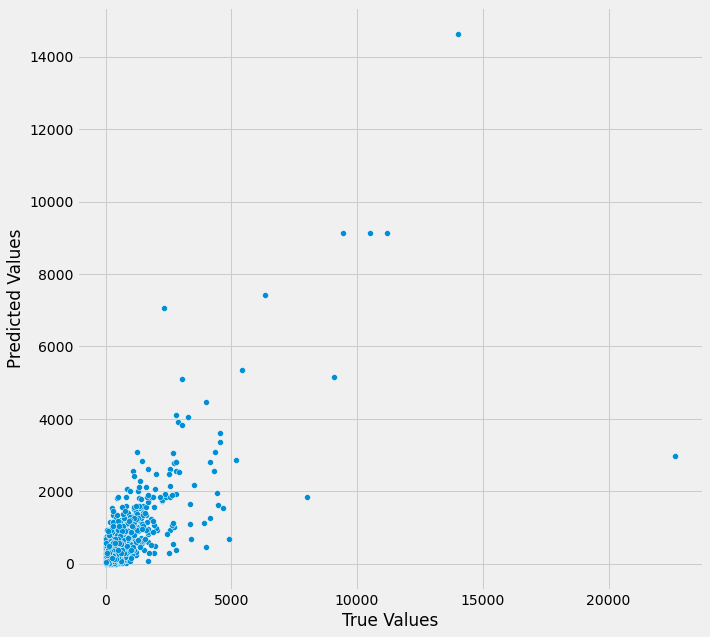

Text(0.5, 1.0, 'Actual vs Predicted for test data')

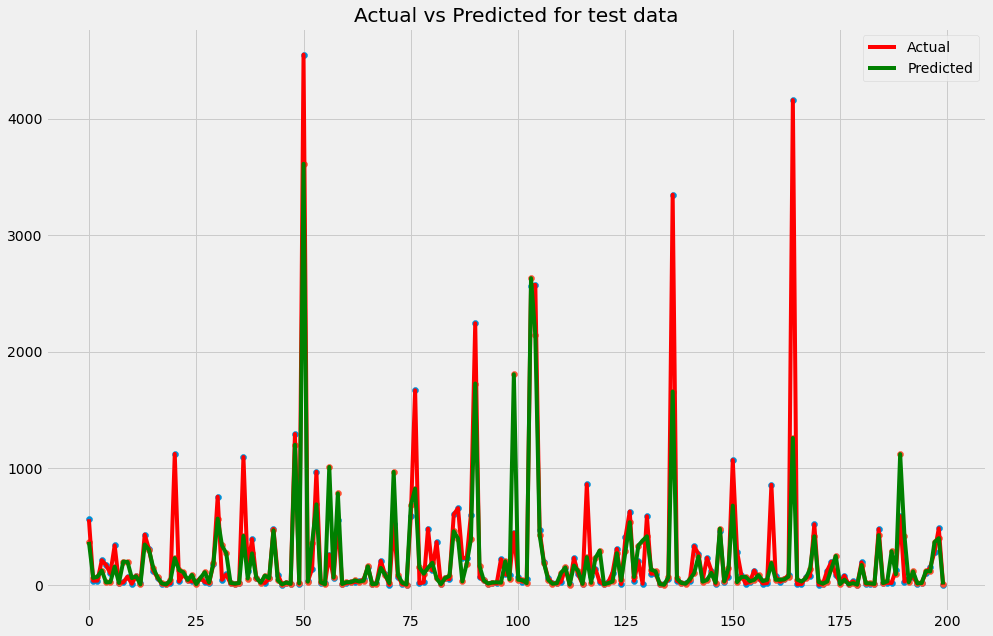

In [20]:
print('========Random forest Model Results =========')
print('Test Dataset Score\n')

print_evaluate(y_test, test_pred_rf)

print('==================================\n')
print('Train Dataset Score\n')

print_evaluate(y_train, train_pred_rf)

# Comparison of actual vs predicted
comparison = pd.DataFrame({'True Values': y_test, 'Predicted Values': 
              test_pred_rf})
# Scatter Plot
plt.figure(figsize=(10,10))
sns.scatterplot(data=comparison, x="True Values", y="Predicted Values")
plt.show()

#actual vs predicted values comparison
plt.figure(figsize=(15,10))
plt.plot(
np.arange(len(y_test[0:200])) , y_test[0:200], "r-", label="Actual values" )
plt.plot( np.arange(len(test_pred_rf[0:200])) , test_pred_rf[0:200], "g-", label="Predicted values"
)
plt.scatter(
 np.arange(len(y_test[0:200])) , y_test[0:200], label="Actual values"
)
plt.scatter(
np.arange(len(test_pred_rf[0:200])) , test_pred_rf[0:200], label="Predicted values" )
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for test data')

# Model 2:LinearRegression

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train1,y_train)
test_pred_linear = lin_reg.predict(X_test1)
train_pred_linear = lin_reg.predict(X_train1)

======== Linear regression Model Results =========
Test Dataset Score

MAE: 244.98715067222048
MSE: 474374.77163139306
RMSE: 688.74869991267
r2_score: 0.17239984139304
__________________________________

Train Dataset Score

MAE: 218.70960342290851
MSE: 205547.5030147636
RMSE: 453.37346968560433
r2_score: 0.2876375491857931
__________________________________


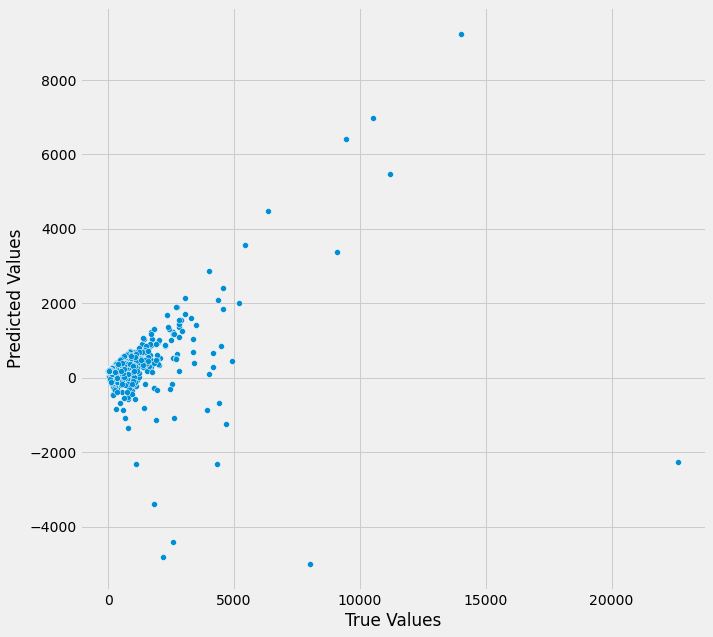

Text(0.5, 1.0, 'Actual vs Predicted for test data')

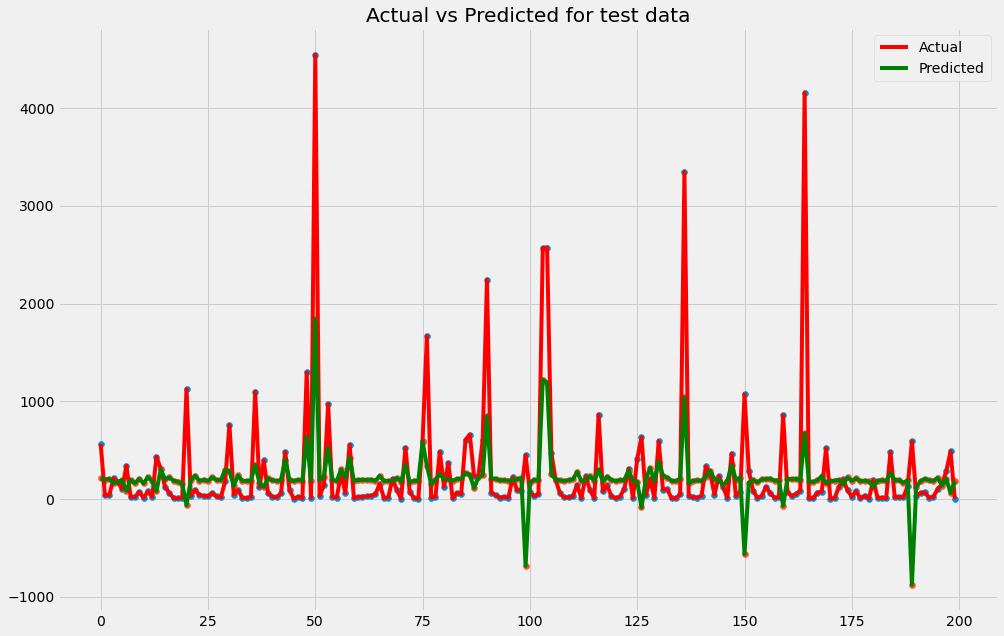

In [22]:
print('======== Linear regression Model Results =========')

print('Test Dataset Score\n')

print_evaluate(y_test, test_pred_linear)

print('==================================\n')
print('Train Dataset Score\n')

print_evaluate(y_train, train_pred_linear)

# Comparison of actual vs predicted
comparison = pd.DataFrame({'True Values': y_test, 'Predicted Values': 
              test_pred_linear})
# Scatter Plot
plt.figure(figsize=(10,10))
sns.scatterplot(data=comparison, x="True Values", y="Predicted Values")
plt.show()

#actual vs predicted values comparison
plt.figure(figsize=(15,10))
plt.plot(
np.arange(len(y_test[0:200])) , y_test[0:200], "r-", label="Actual values" )
plt.plot( np.arange(len(test_pred_linear[0:200])) , test_pred_linear[0:200], "g-", label="Predicted values"
)
plt.scatter(
 np.arange(len(y_test[0:200])) , y_test[0:200], label="Actual values"
)
plt.scatter(
np.arange(len(test_pred_linear[0:200])) , test_pred_linear[0:200], label="Predicted values" )
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for test data')

# 2:training and evaluating using all the features

# Model 1:RandomForestRegressor

In [23]:
rf_reg = RandomForestRegressor(random_state=1000)
rf_reg.fit(X_train, y_train)
test_pred_rf = rf_reg.predict(X_test)
train_pred_rf = rf_reg.predict(X_train)


========Random forest Model Results =========
Test Dataset Score

MAE: 96.21700851743854
MSE: 172604.2671584025
RMSE: 415.45669709176974
r2_score: 0.698872437112803
__________________________________

Train Dataset Score

MAE: 32.6049124830665
MSE: 10769.512022263782
RMSE: 103.77625943472708
r2_score: 0.9626762871563472
__________________________________


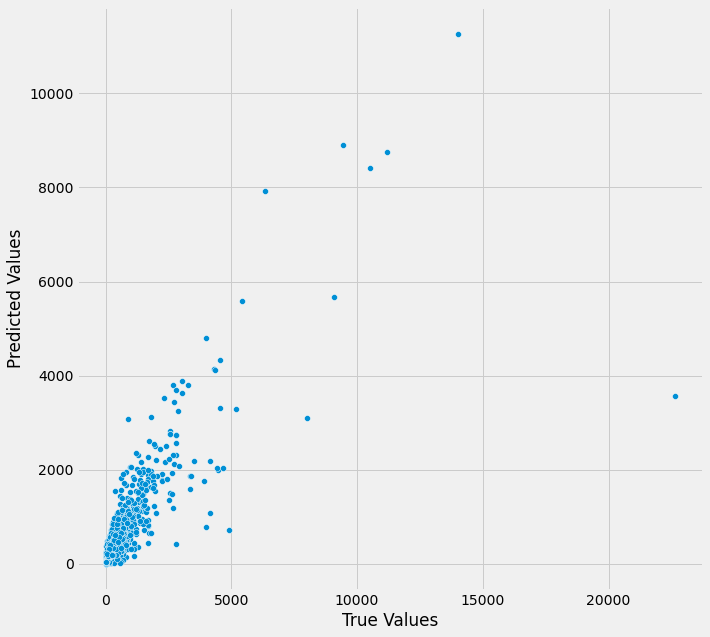

Text(0.5, 1.0, 'Actual vs Predicted for test data')

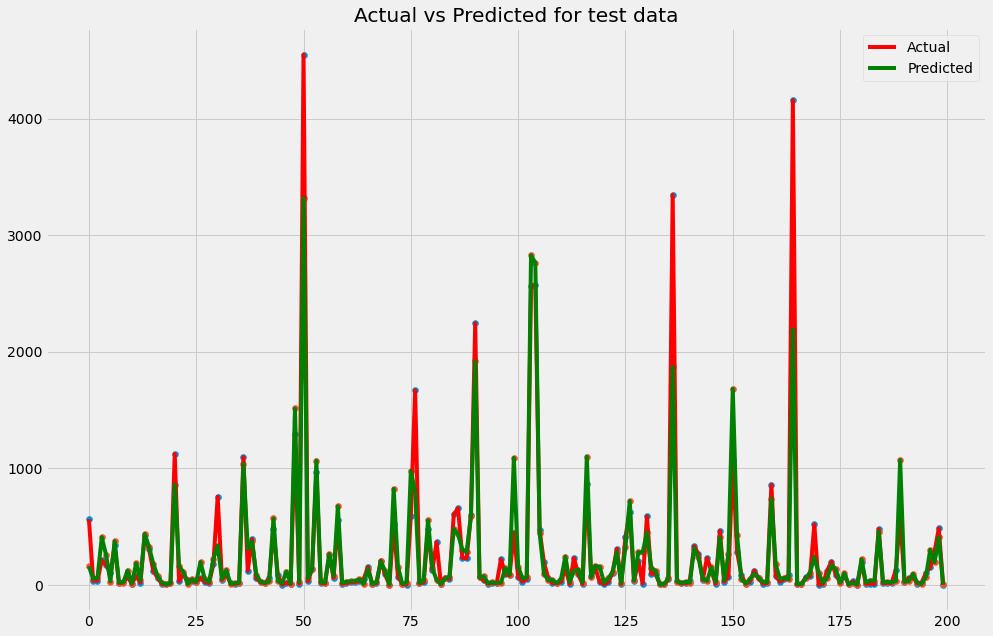

In [24]:
print('========Random forest Model Results =========')

print('Test Dataset Score\n')

print_evaluate(y_test, test_pred_rf)

print('==================================\n')
print('Train Dataset Score\n')

print_evaluate(y_train, train_pred_rf)

# Comparison of actual vs predicted
comparison = pd.DataFrame({'True Values': y_test, 'Predicted Values': 
              test_pred_rf})
# Scatter Plot
plt.figure(figsize=(10,10))
sns.scatterplot(data=comparison, x="True Values", y="Predicted Values")
plt.show()

#actual vs predicted values comparison
plt.figure(figsize=(15,10))
plt.plot(
np.arange(len(y_test[0:200])) , y_test[0:200], "r-", label="Actual values" )
plt.plot( np.arange(len(test_pred_rf[0:200])) , test_pred_rf[0:200], "g-", label="Predicted values"
)
plt.scatter(
 np.arange(len(y_test[0:200])) , y_test[0:200], label="Actual values"
)
plt.scatter(
np.arange(len(test_pred_rf[0:200])) , test_pred_rf[0:200], label="Predicted values" )
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for test data')

# Model 2:LinearRegression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
test_pred_linear = lin_reg.predict(X_test)
train_pred_linear = lin_reg.predict(X_train)

======== Linear regression Model Results =========
Test Dataset Score

MAE: 214.8619894571747
MSE: 438049.3419285945
RMSE: 661.8529609577905
r2_score: 0.23577364029915482
__________________________________

Train Dataset Score

MAE: 192.03818912612402
MSE: 181044.9319980469
RMSE: 425.4937508331314
r2_score: 0.37255568871417155
__________________________________


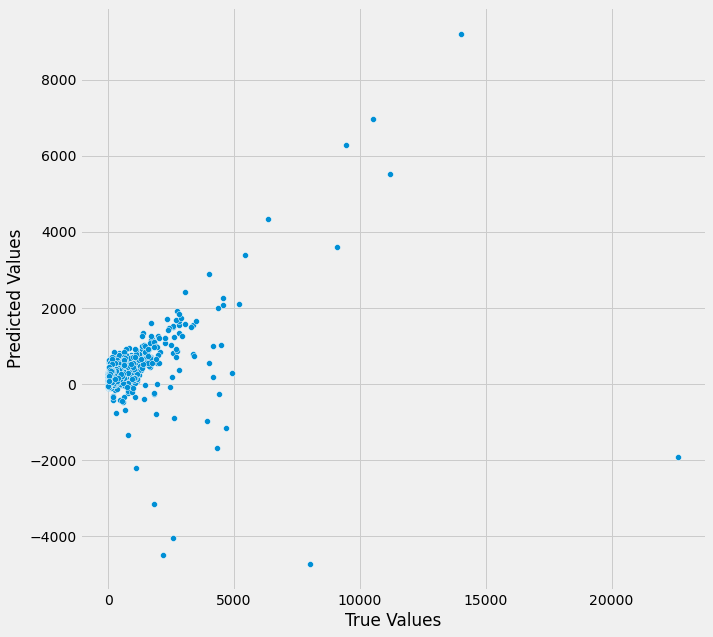

Text(0.5, 1.0, 'Actual vs Predicted for test data')

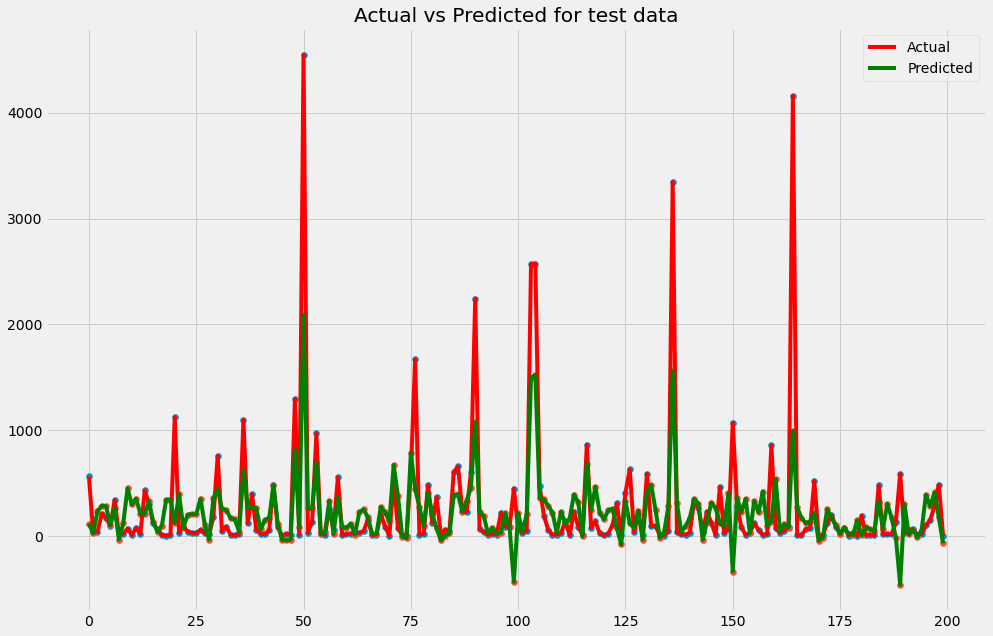

In [26]:
print('======== Linear regression Model Results =========')

print('Test Dataset Score\n')

print_evaluate(y_test, test_pred_linear)

print('==================================\n')
print('Train Dataset Score\n')

print_evaluate(y_train, train_pred_linear)

# Comparison of actual vs predicted
comparison = pd.DataFrame({'True Values': y_test, 'Predicted Values': 
              test_pred_linear})
# Scatter Plot
plt.figure(figsize=(10,10))
sns.scatterplot(data=comparison, x="True Values", y="Predicted Values")
plt.show()

#actual vs predicted values comparison
plt.figure(figsize=(15,10))
plt.plot(
np.arange(len(y_test[0:200])) , y_test[0:200], "r-", label="Actual values" )
plt.plot( np.arange(len(test_pred_linear[0:200])) , test_pred_linear[0:200], "g-", label="Predicted values"
)
plt.scatter(
 np.arange(len(y_test[0:200])) , y_test[0:200], label="Actual values"
)
plt.scatter(
np.arange(len(test_pred_linear[0:200])) , test_pred_linear[0:200], label="Predicted values" )
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted for test data')

# Conclusion:
In this study, Superstore dataset was studied to predict the Sales based on certain features present in the dataset. In this study,we applied several experiments, one with taking profit as input to predict the sales and other by taking all features as input to predict the sales. RandomForestRegressor has performed better by taking all features as input for Superstore dataset with MAE of  96.217, and R2 score of 0.698 for the test data.